In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
DatasetTrain = pd.read_excel('DatasetTrain.xlsx')
DatasetTest =pd.read_excel('DatasetTest.xlsx')

In [4]:
y_train =  DatasetTrain['SARS-Cov-2 exam result']
X_train = DatasetTrain.drop('SARS-Cov-2 exam result',axis=1)
y_test = DatasetTest['SARS-Cov-2 exam result']
X_test = DatasetTest.drop('SARS-Cov-2 exam result',axis=1)

In [6]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [7]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print (confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    print(val_score.mean(axis=1)[-1])
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')#
    plt.legend()
    plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

In [9]:
preprocessor = make_pipeline(PolynomialFeatures(3),SelectKBest(f_classif, k=19)) 

In [10]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0) )
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(),SVC(gamma=0.003 ,C=2300, random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [41]:
dict_of_models = {'RandomForest' : RandomForest,
                  'AdaBoost' : AdaBoost ,
                  'SVM'  : SVM,
                  'KNN' : KNN }

RandomForest
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

0.5496794871794872


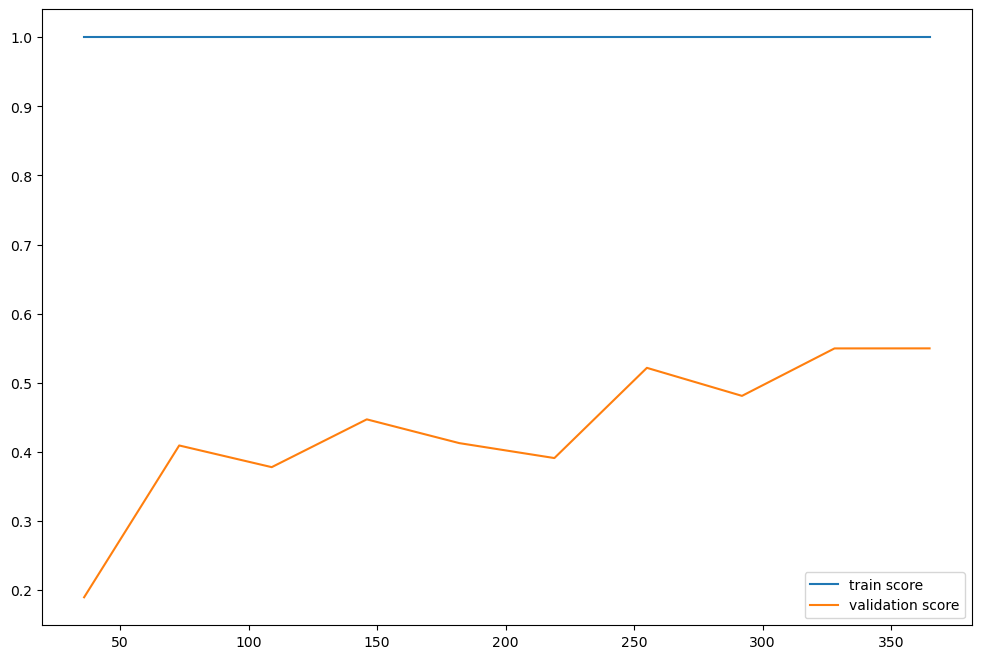

AdaBoost
[[90  5]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.64      0.56      0.60        16

    accuracy                           0.89       111
   macro avg       0.79      0.75      0.77       111
weighted avg       0.89      0.89      0.89       111

0.5487069237069238


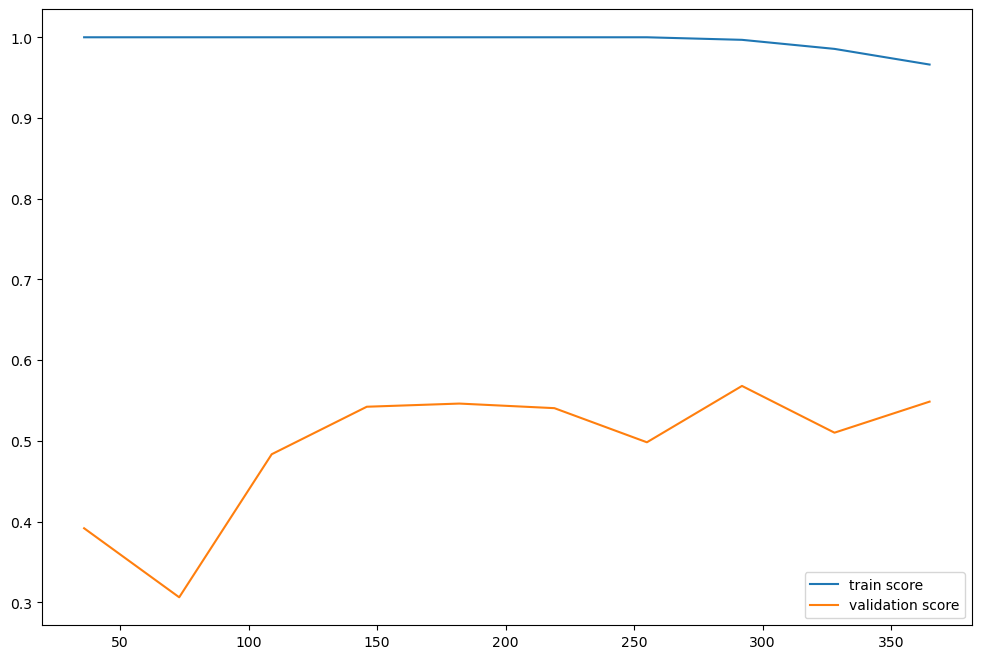

SVM
[[91  4]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.67      0.50      0.57        16

    accuracy                           0.89       111
   macro avg       0.79      0.73      0.75       111
weighted avg       0.88      0.89      0.89       111

0.680849358974359


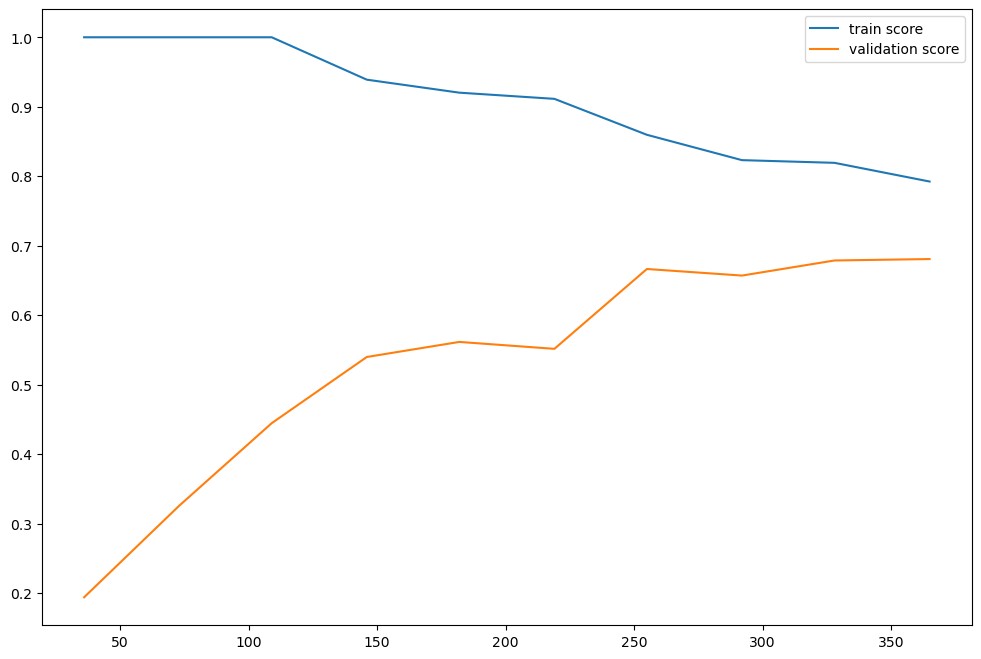

KNN
[[91  4]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        95
           1       0.60      0.38      0.46        16

    accuracy                           0.87       111
   macro avg       0.75      0.67      0.70       111
weighted avg       0.86      0.87      0.86       111

0.5506993006993007


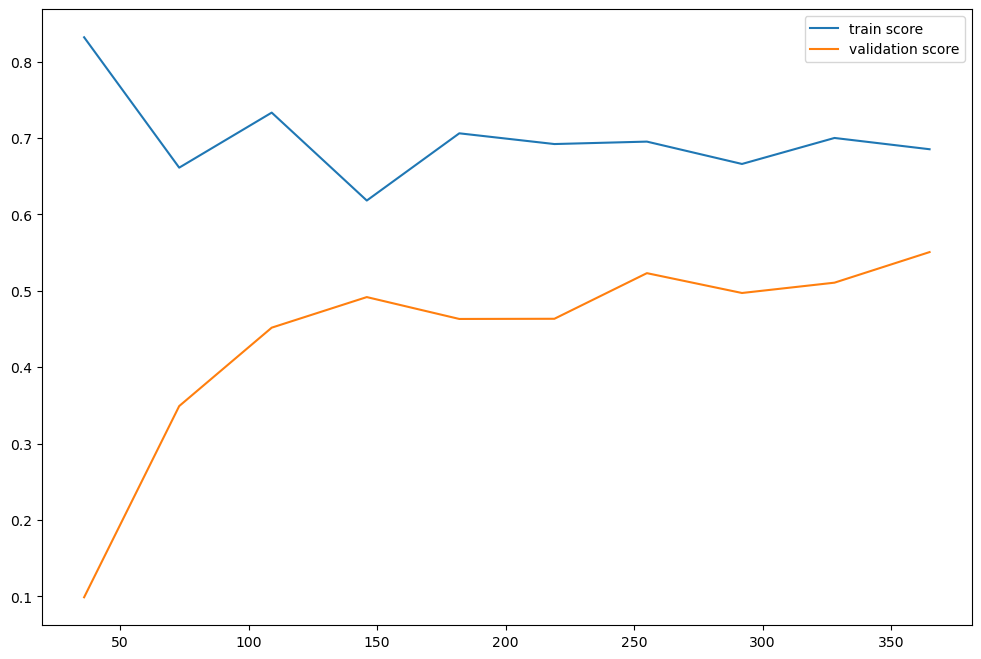

In [42]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [43]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3)),
                                 ('selectkbest', SelectKBest(k=19))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=2300, gamma=0.003, random_state=0))])

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
"""hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)
               }"""

"hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],\n                'svc__C':[1, 10, 100, 1000, 3000], \n               'pipeline__polynomialfeatures__degree':[2, 3],\n               'pipeline__selectkbest__k': range(45, 60)\n               }"

In [16]:
tol=0.001,
coef0=0.0,

In [17]:
SVC

sklearn.svm._classes.SVC

In [18]:
hyper_params = {'svc__gamma':[0.004,0.003,0.002],#0.002,
                'svc__C'    :[2000,2300,2500,2800],#,2700,,3250,3500,,3000
                'pipeline__polynomialfeatures__degree' : [2, 3,4],
                'pipeline__selectkbest__k' : range(4,30), 
                #'svc__tol' : [1e-3,1e-2,1e-1],
               # 'svc__coef0' : [-1,0,1]
               }
def TRY():    
    grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,n_iter=50)

    grid.fit(X_train, y_train)

    print(grid.best_params_)

    y_pred = grid.predict(X_test)

    print(classification_report(y_test, y_pred))
    

In [19]:
SVM = make_pipeline(preprocessor, StandardScaler(),SVC(gamma=0.003 ,C=2300, random_state=0))


[[91  4]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        95
           1       0.67      0.50      0.57        16

    accuracy                           0.89       111
   macro avg       0.79      0.73      0.75       111
weighted avg       0.88      0.89      0.89       111

0.680849358974359


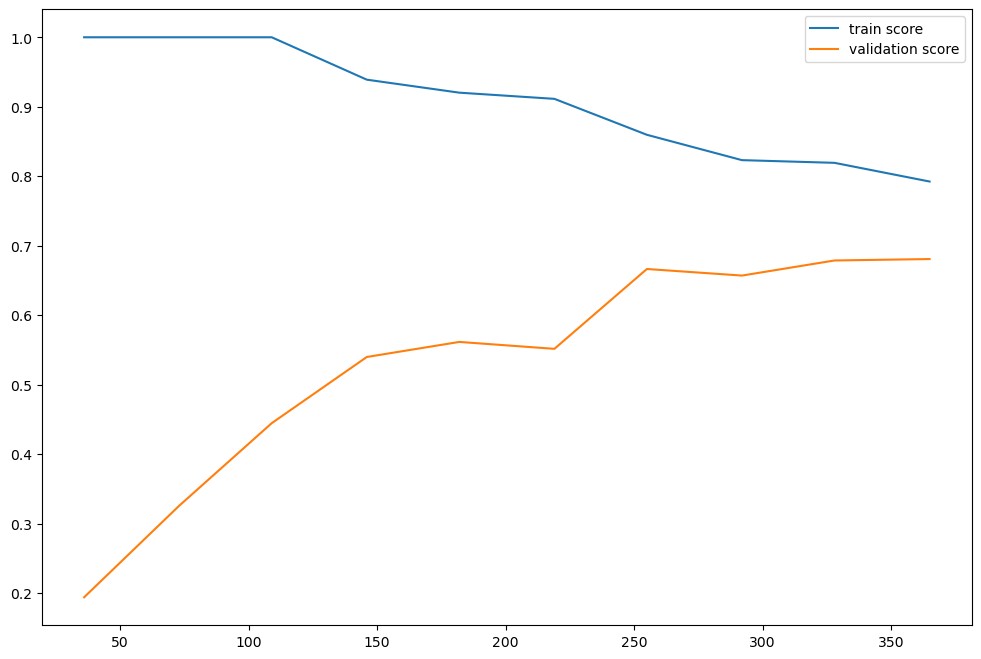

In [20]:
evaluation(SVM)

In [21]:
from sklearn.metrics import precision_recall_curve, recall_score

In [22]:
precision, recall, threshold = precision_recall_curve(y_test,SVM.decision_function(X_test) )

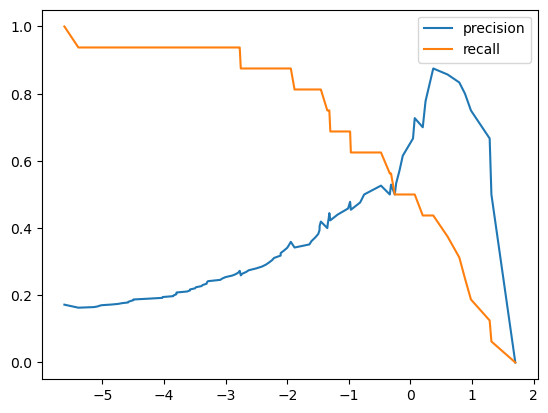

In [23]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [24]:
def model_final(model, X, threshold=0):
    return model.decision_function(X)> threshold

In [25]:
y_pred = model_final(SVM, X_test, threshold=-1.5)

In [26]:
f1_score(y_test, y_pred)

0.52

In [27]:
recall_score(y_test, y_pred)

0.8125

# Etude sur AdaBoost

In [28]:
preprocessor = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=26)) 

In [29]:
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(n_estimators=30, learning_rate=1, random_state=0))

In [30]:
hyper_params = {'adaboostclassifier__n_estimators':[30],#,35,40,45,50
                'adaboostclassifier__learning_rate':[1.0],
                'pipeline__polynomialfeatures__degree' : [2,3,4,5],
                'pipeline__selectkbest__k' : [26],#range(50,60), 
               }
def TryAdaBoost():    
    grid = RandomizedSearchCV(AdaBoost, hyper_params, scoring='recall', cv=4,n_iter=60)

    grid.fit(X_train, y_train)

    print(grid.best_params_)

    y_pred = grid.predict(X_test)

    print(classification_report(y_test, y_pred))
    

[[90  5]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.64      0.56      0.60        16

    accuracy                           0.89       111
   macro avg       0.79      0.75      0.77       111
weighted avg       0.89      0.89      0.89       111

0.5487069237069238


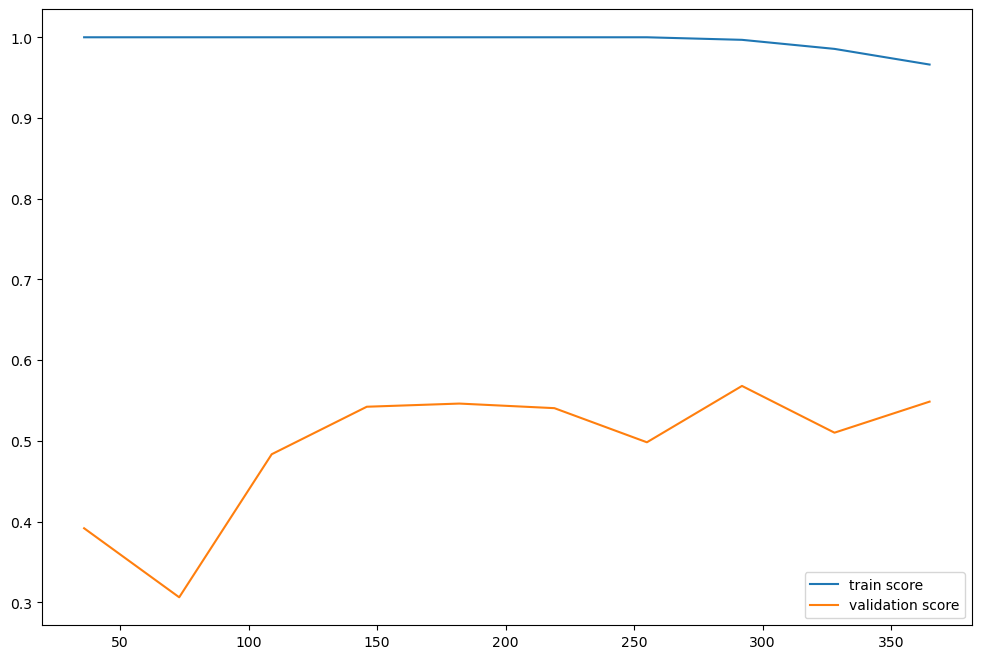

In [31]:
evaluation(AdaBoost)

In [32]:
precision, recall, threshold = precision_recall_curve(y_test,AdaBoost.decision_function(X_test) )

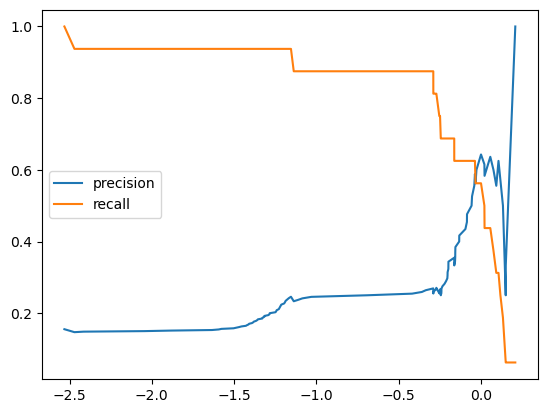

In [33]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [34]:
def model_finalA(model, X, threshold=0):
    return model.decision_function(X)> threshold

In [35]:
y_predA = model_final(AdaBoost, X_test, threshold=-0.17)

In [36]:
f1_score(y_test, y_predA)

0.4680851063829787

In [37]:
recall_score(y_test, y_predA)

0.6875